#### O conjunto de dados de previsão de diabetes é uma coleção de dados médicos e demográficos de pacientes, juntamente com seu status de diabetes (positivo ou negativo). Os dados incluem características como idade, gênero, índice de massa corporal (IMC), hipertensão, doença cardíaca, histórico de tabagismo, nível de HbA1c e nível de glicose no sangue.

- Fonte: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
base = pd.read_csv(r'C:/Users/carol/Downloads/diabetes_prediction_dataset.csv')

In [3]:
base.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
base.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
base.shape

(100000, 9)

In [7]:
base.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [8]:
base.duplicated().sum()

3854

In [9]:
base.duplicated().describe()

count     100000
unique         2
top        False
freq       96146
dtype: object

In [10]:
base.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [11]:
base.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [12]:
base['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

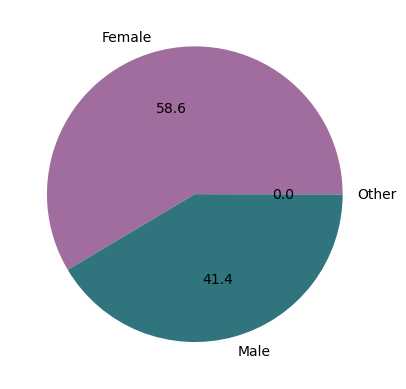

In [13]:
labels = base['gender'].value_counts()
colors='#A16D9E','#30747E'
fig,ax = plt.subplots()
ax.pie(base.gender.value_counts(),labels=labels.index,autopct ='%.01f',colors=colors);

In [14]:
base['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [15]:
base['hypertension'].value_counts()

0    92515
1     7485
Name: hypertension, dtype: int64

In [16]:
base['heart_disease'].value_counts()

0    96058
1     3942
Name: heart_disease, dtype: int64

C:\Users\carol\AppData\Local\Temp\ipykernel_15244\2409226050.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = base.corr()


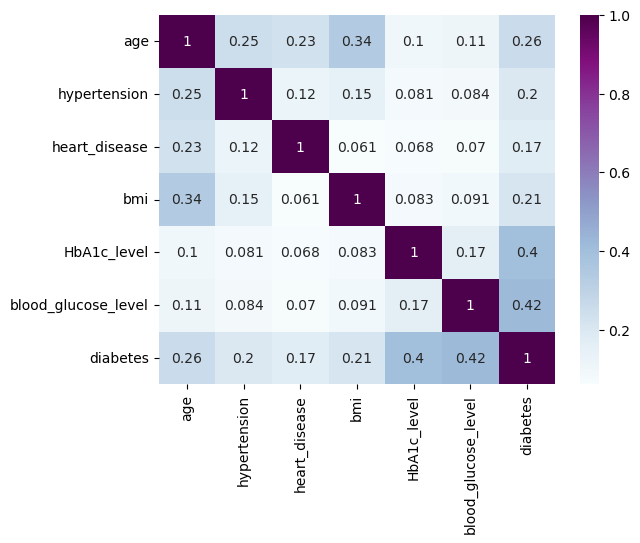

In [17]:
corr = base.corr()

sns.heatmap(corr, cmap='BuPu', annot=True);

A partir do mapa de calor de correlação, podemos observar quais são os fatores que podem ter uma maior relação com a diabetes, e são eles:
nível de hemoglobina glicada
nível de glucose 
idade


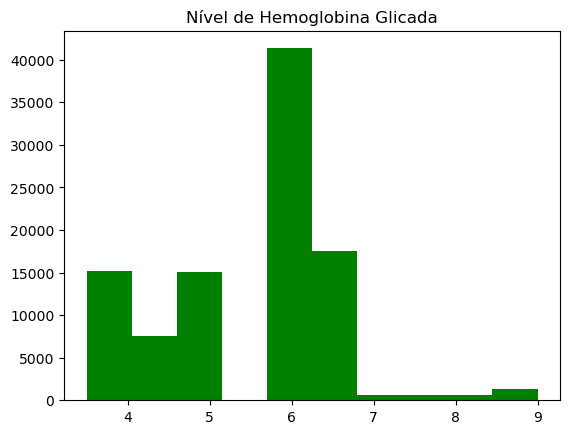

In [18]:

base['HbA1c_level'].hist(grid=False,color='green');
plt.title('Nível de Hemoglobina Glicada');

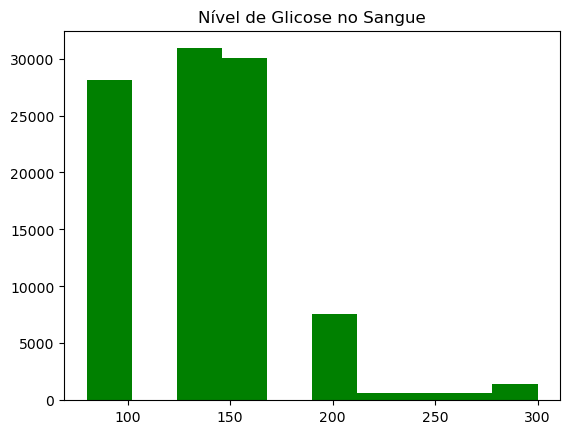

In [19]:
base['blood_glucose_level'].hist(grid=False,color= 'green');
plt.title('Nível de Glicose no Sangue');

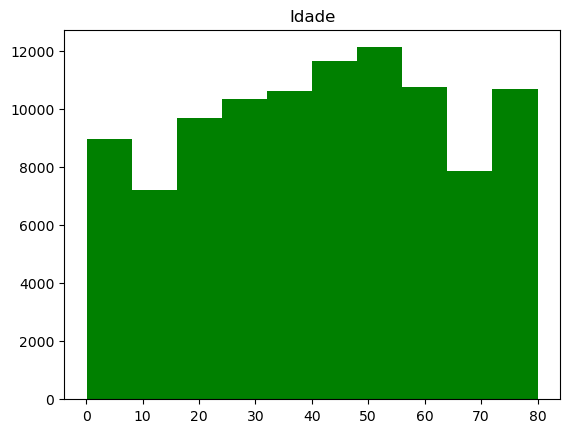

In [20]:
base['age'].hist(grid=False,color='green')
plt.title('Idade');

In [21]:
base_diabetes = base[base['diabetes'] == 1]
base_diabetes['gender'].value_counts()

Female    4461
Male      4039
Name: gender, dtype: int64

A partir daqui, visualizaremos os dados de pacientes já constatados diabéticos

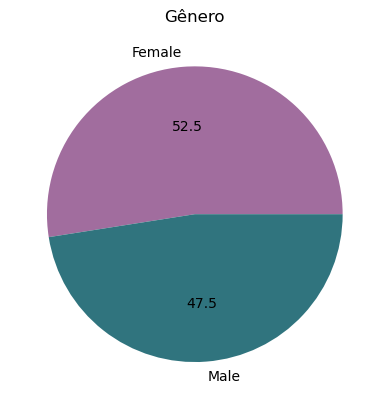

In [22]:

labels = ['Female','Male']
colors='#A16D9E','#30747E'
plt.title('Gênero')
plt.pie(base_diabetes['gender'].value_counts(), labels=labels,autopct ='%.01f',colors=colors);

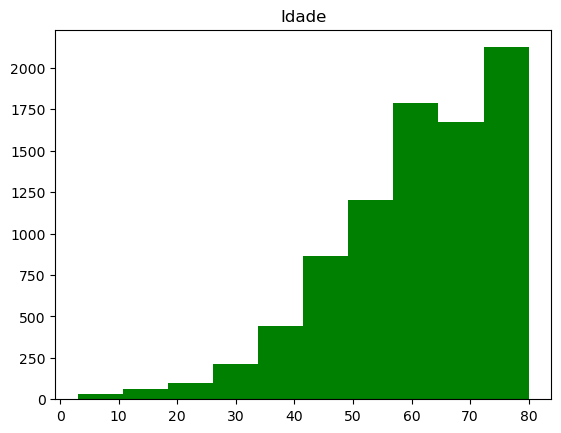

In [23]:
base_diabetes['age'].hist(color='green', grid=False)
plt.title('Idade');

Podemos observar que quanto maior a idade, maior a prevalência do diabetes, sendo assim, observamos um número maior de diabéticos após os 40 anos.

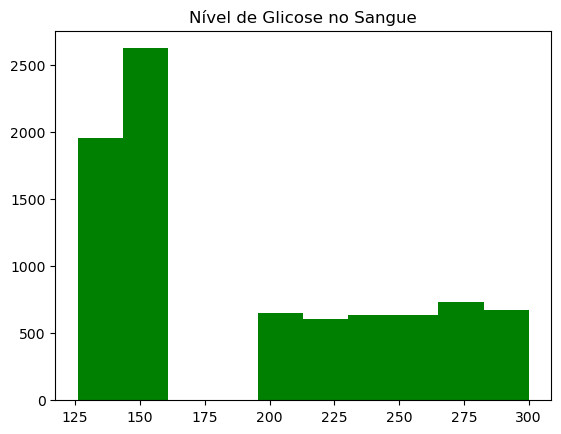

In [24]:
base_diabetes['blood_glucose_level'].hist(color='green', grid=False)
plt.title('Nível de Glicose no Sangue');

A glicose medida é o valor que se encontra naquele momento no corpo, podendo variar muito em horas, devido a ingestão de certos alimentos e esse exame é usado para o  controle das variações da glicose no paciente.

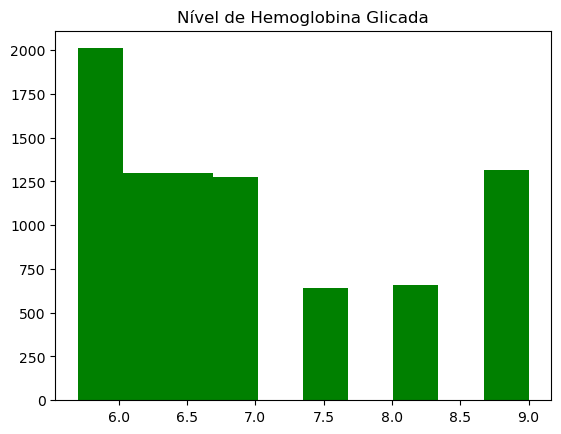

In [25]:
base_diabetes['HbA1c_level'].hist( color='green',grid=False)
plt.title('Nível de Hemoglobina Glicada');

A hemoglobina glicada é um exame que consegue inferir os valores de glicose no sangue, conseguindo mostrar como os valores estavam entre os 3 últimos meses, isso ocorre, pois a glicose se liga a molécula de hemoglobina, sendo que as hemácias, durante em média 3 meses. Os valores de hemoglobina glicada considerados normais estão entre 4,5 a 5,6%

In [26]:
#separando em x e y
x = base.drop('diabetes',axis = 1)
y = base.diabetes

In [27]:
#tratando a coluna smoking_history
from sklearn.preprocessing import OneHotEncoder

In [28]:
ohe = OneHotEncoder()

In [29]:
ohe = ohe.fit(x[['smoking_history']])

In [30]:
ohe.transform(x[['smoking_history']]).toarray()

array([[0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [31]:
ohe_df = pd.DataFrame(ohe.transform(x[['smoking_history']]).toarray())
ohe_df.head(3)

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
#nomeando as colunas
ohe_df.columns = ohe.get_feature_names_out()

In [33]:
ohe_df.head(3)

,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
base = pd.concat([base,ohe_df],axis = 1)

In [35]:
base.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,Female,80.0,0,1,never,25.19,6.6,140,0,0.0,0.0,0.0,0.0,1.0,0.0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,1.0,0.0,0.0,0.0,0.0,0.0
2,Male,28.0,0,0,never,27.32,5.7,158,0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
base = base.drop('smoking_history', axis = 1)

In [37]:
#separando em x e y novamente
x = base.drop('diabetes',axis = 1)
y = base.diabetes

In [38]:
#lambda function para a  coluna gender
base['Is_Male'] = base.gender.apply(lambda x: 1 if x == 'Male' else 0)
#para fins didaticos, vamos tratar outros como Female 

In [39]:
base[['gender','Is_Male']].value_counts()

gender  Is_Male
Female  0          58552
Male    1          41430
Other   0             18
dtype: int64

In [40]:
base = base.drop('gender',axis = 1)